### 탈황제 저감 최적화를 위한 데이터 파악을 위한 dashboard 제작
####

In [1]:
# pip install webdriver_manager
# pip install selenium
# pip install selenium dash-html-export
# pip install dash
# pip install pandas seaborn matplotlib
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

import scipy.stats as stats

import dash
import dash_core_components as dc

import dash_html_components as html
import pandas as pd
import numpy as np
import sympy as sp

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from functools import reduce
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from dash import dcc, html, Input, Output, Dash, State
from dash.dependencies import Output, Input
from numpy import trapz

#import matplotlib as mpl
#mpl.rcParams['axes.unicode_minus'] = False
#mpl.rcParams['font.family'] = 'Malgun Gothic'

C:\Users\dlwjd\AppData\Local\Temp\ipykernel_4900\1904042585.py:16: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dc
C:\Users\dlwjd\AppData\Local\Temp\ipykernel_4900\1904042585.py:18: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


### 각 호기의 outlet 배출 기준
### 3호기 15ppm
### 4호기 25ppm
### 5호기 48ppm
### 6호기 48ppm

### 전체 데이터 불러오기

In [4]:
df_komipo = pd.read_csv('./komi.csv', encoding = 'utf-8')
df_komipo

C:\Users\dlwjd\AppData\Local\Temp\ipykernel_4900\3153633518.py:1: DtypeWarning: Columns (1,2,4,5,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_komipo = pd.read_csv('./komi.csv', encoding = 'utf-8')


,date,power_3,outlet_3,normal_3,power_4,outlet_4,normal_4,power_5,outlet_5,normal_5,...,inlet_5,inlet_6,ph_3,ph_4,ph_5,ph_6,ton_3,ton_4,ton_5,ton_6
0,2023-09-01 0:00,474,0.68,정상,0,1.14,정상,456,15.06,정상,...,185.770000,240.870000,5.20,4.94,6.07,6.13,5.710000,5.340,0.030000,5.56
1,2023-09-01 0:05,486,0.36,정상,0,1.61,정상,473,15.52,정상,...,185.770000,244.570000,5.11,4.86,6.05,6.12,3.070000,4.280,0.030000,5.76
2,2023-09-01 0:10,510,0.4,정상,0,1.74,정상,470,15.71,정상,...,NaN,228.000000,4.96,4.76,6.04,6.11,3.430000,3.760,0.030000,6.95
3,2023-09-01 0:15,518,1.74,정상,0,2.04,정상,454,16.69,정상,...,185.770000,233.270000,4.80,4.64,6.02,6.11,10.620000,4.250,0.030000,8.05
4,2023-09-01 0:20,518,1.52,정상,0,1.49,정상,434,16.13,정상,...,NaN,243.460000,5.06,4.53,6.04,6.11,11.990000,10.400,0.030000,17.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53275,2024-02-29 23:35,418,5.22,정상,0,6.82,정상,481,19.46,정상,...,335.489831,2.521914,6.04,4.83,5.18,6.98,20.185496,5.968,9.473010,0.00
53276,2024-02-29 23:40,418,4.99,정상,0,7.44,정상,482,20.21,정상,...,332.655682,2.531338,6.04,4.83,5.17,6.97,20.213262,5.902,9.271150,NaN
53277,2024-02-29 23:45,418,4.86,정상,0,6.83,정상,476,20.24,정상,...,331.522790,2.450782,6.04,4.83,5.18,6.97,20.188637,5.906,9.112337,0.00
53278,2024-02-29 23:50,419,4.8,정상,0,7.09,정상,473,20.25,정상,...,313.757489,2.571517,6.04,4.83,5.18,6.97,20.196018,5.936,9.011972,NaN


### 데이터의 데이터 타입 확인 및 누락된 데이터 제거

In [6]:
df_komipo.dtypes

date         object
power_3      object
outlet_3     object
normal_3     object
power_4      object
outlet_4     object
normal_4     object
power_5      object
outlet_5     object
normal_5     object
power_6      object
outlet_6     object
normal_6     object
inlet_3     float64
inlet_4     float64
inlet_5     float64
inlet_6     float64
ph_3        float64
ph_4        float64
ph_5        float64
ph_6        float64
ton_3       float64
ton_4       float64
ton_5       float64
ton_6       float64
dtype: object

In [7]:
df_komipo.isnull().sum()

date           0
power_3        0
outlet_3       0
normal_3       0
power_4        0
outlet_4       0
normal_4       0
power_5        0
outlet_5       0
normal_5       0
power_6        0
outlet_6       0
normal_6       0
inlet_3     3176
inlet_4     5403
inlet_5     5156
inlet_6     5977
ph_3        3167
ph_4        3170
ph_5        3819
ph_6        3174
ton_3       3169
ton_4       3169
ton_5       3817
ton_6       3585
dtype: int64

In [8]:
df_komipo.dropna(inplace = True)
df_komipo.isnull().sum()

date        0
power_3     0
outlet_3    0
normal_3    0
power_4     0
outlet_4    0
normal_4    0
power_5     0
outlet_5    0
normal_5    0
power_6     0
outlet_6    0
normal_6    0
inlet_3     0
inlet_4     0
inlet_5     0
inlet_6     0
ph_3        0
ph_4        0
ph_5        0
ph_6        0
ton_3       0
ton_4       0
ton_5       0
ton_6       0
dtype: int64

### 계산 및 그래프를 위한 데이터의 변환 중 '-'와 ','로 인한 문제 해결

In [10]:
df_komipo = df_komipo[~df_komipo.astype('str').apply(lambda row:'-' in row.values, axis = 1)]

In [11]:
list = ['power_3','inlet_3','outlet_3','ph_3'
        ,'power_4','inlet_4','outlet_4','ph_4'
        ,'power_5','inlet_5','outlet_5','ph_5'
        ,'power_6','inlet_6','outlet_6','ph_6']

for i in list:
    df_komipo[i] = df_komipo[i].astype('str')

for i in list:
    df_komipo[i] = df_komipo[i].str.replace(',','').astype(float)

df_komipo['date'] = df_komipo['date'].astype('datetime64[ns]')
df_komipo.dtypes

C:\Users\dlwjd\AppData\Local\Temp\ipykernel_4900\294764845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_komipo[i] = df_komipo[i].astype('str')
C:\Users\dlwjd\AppData\Local\Temp\ipykernel_4900\294764845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_komipo[i] = df_komipo[i].astype('str')
C:\Users\dlwjd\AppData\Local\Temp\ipykernel_4900\294764845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

date        datetime64[ns]
power_3            float64
outlet_3           float64
normal_3            object
power_4            float64
outlet_4           float64
normal_4            object
power_5            float64
outlet_5           float64
normal_5            object
power_6            float64
outlet_6           float64
normal_6            object
inlet_3            float64
inlet_4            float64
inlet_5            float64
inlet_6            float64
ph_3               float64
ph_4               float64
ph_5               float64
ph_6               float64
ton_3              float64
ton_4              float64
ton_5              float64
ton_6              float64
dtype: object

In [12]:
df_komipo

,date,power_3,outlet_3,normal_3,power_4,outlet_4,normal_4,power_5,outlet_5,normal_5,...,inlet_5,inlet_6,ph_3,ph_4,ph_5,ph_6,ton_3,ton_4,ton_5,ton_6
0,2023-09-01 00:00:00,474.0,0.68,정상,0.0,1.14,정상,456.0,15.06,정상,...,185.770000,240.870000,5.20,4.94,6.07,6.13,5.710000,5.340000,0.030000,5.56
1,2023-09-01 00:05:00,486.0,0.36,정상,0.0,1.61,정상,473.0,15.52,정상,...,185.770000,244.570000,5.11,4.86,6.05,6.12,3.070000,4.280000,0.030000,5.76
3,2023-09-01 00:15:00,518.0,1.74,정상,0.0,2.04,정상,454.0,16.69,정상,...,185.770000,233.270000,4.80,4.64,6.02,6.11,10.620000,4.250000,0.030000,8.05
5,2023-09-01 00:25:00,526.0,0.82,정상,0.0,1.23,정상,430.0,16.33,정상,...,129.130000,249.440000,5.18,4.75,6.03,6.10,6.650000,11.830000,0.030000,40.28
6,2023-09-01 00:30:00,526.0,0.83,정상,0.0,0.93,정상,428.0,16.84,정상,...,98.600000,269.530000,5.11,4.97,6.03,6.10,3.200000,7.080000,0.030000,40.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53271,2024-02-29 23:15:00,418.0,6.26,정상,0.0,7.81,정상,479.0,21.20,정상,...,331.348395,2.487636,6.04,4.82,5.18,6.98,20.059962,4.826000,9.397184,0.00
53273,2024-02-29 23:25:00,418.0,5.84,정상,0.0,7.08,정상,486.0,21.61,정상,...,347.742755,2.614689,6.04,4.82,5.18,6.98,20.135826,7.070833,9.497630,0.00
53275,2024-02-29 23:35:00,418.0,5.22,정상,0.0,6.82,정상,481.0,19.46,정상,...,335.489831,2.521914,6.04,4.83,5.18,6.98,20.185496,5.968000,9.473010,0.00
53277,2024-02-29 23:45:00,418.0,4.86,정상,0.0,6.83,정상,476.0,20.24,정상,...,331.522790,2.450782,6.04,4.83,5.18,6.97,20.188637,5.906000,9.112337,0.00


### 많은 양의 데이터로 인해 그래프가 잘보이지 않아 
### 데이터 추이 확인을 위한 일별 평균 데이터 제작을 위한 날짜 컬럼 생성

In [14]:
df_3 = df_komipo[['date','power_3','outlet_3','inlet_3','ton_3','normal_3','ph_3']]

df_4 = df_komipo[['date','power_4','outlet_4','inlet_4','ton_4','normal_4','ph_4']]

df_5 = df_komipo[['date','power_5','outlet_5','inlet_5','ton_5','normal_5','ph_5']]

df_6 = df_komipo[['date','power_6','outlet_6','inlet_6','ton_6','normal_6','ph_6']]

### 들어온 아황산 가스인 inlet과 그에 따른 탈황제량을 보여주는 ton에서의 -값을 제거
### 들어온 아황산 가스에 따른 나간 아황산 가스의 양을 퍼센트로 표현 per_각호기번호

In [21]:
df_3 = df_3[df_3['normal_3'] == '정상']
df_3 = df_3[df_3['inlet_3'] >= 0]
df_3 = df_3[df_3['ton_3'] >= 0]

df_4 = df_4[df_4['normal_4'] == '정상']
df_4 = df_4[df_4['inlet_4'] >= 0]
df_4 = df_4[df_4['ton_4'] >= 0]

df_5 = df_5[df_5['normal_5'] == '정상']
df_5 = df_5[df_5['inlet_5'] >= 0]
df_5 = df_5[df_5['ton_5'] >= 0]

df_6 = df_6[df_6['normal_6'] == '정상']
df_6 = df_6[df_6['inlet_6'] >= 0]
df_6 = df_6[df_6['ton_6'] >= 0]

In [22]:
df_3.normal_3.unique()

array(['정상'], dtype=object)

### 각 호기의 첫번쨰 행과 기술 통계

In [25]:
dfs = [df_3,df_4,df_5,df_6]

for i in dfs:
    display(i.head(1))
    print(i.describe())
    print('*'*80)


,date,power_3,outlet_3,inlet_3,ton_3,normal_3,ph_3
0,2023-09-01,474.0,0.68,189.45,5.71,정상,5.2


                                date       power_3      outlet_3  \
count                          41210  41210.000000  41210.000000   
mean   2023-12-05 13:51:14.115505664    457.241349      8.010469   
min              2023-09-01 00:00:00      1.000000      0.000000   
25%              2023-10-13 09:06:15    496.000000      2.470000   
50%              2023-12-12 06:22:30    519.000000      3.610000   
75%              2024-01-20 21:48:45    524.000000      4.890000   
max              2024-02-29 23:55:00    584.000000   1267.600000   
std                              NaN    149.301126     32.564189   

            inlet_3         ton_3          ph_3  
count  41210.000000  41210.000000  41210.000000  
mean     199.554032      7.669369      5.989481  
min        0.001667      0.000000      4.360000  
25%      172.550278      4.640000      5.670000  
50%      202.607222      6.469587      6.050000  
75%      244.806762      9.602199      6.210000  
max      402.878667     72.261812    

,date,power_4,outlet_4,inlet_4,ton_4,normal_4,ph_4
0,2023-09-01,0.0,1.14,203.08,5.34,정상,4.94


                                date  power_4      outlet_4       inlet_4  \
count                          37560  37560.0  37560.000000  37560.000000   
mean   2023-12-11 20:18:30.838658048      0.0      1.953691    184.563273   
min              2023-09-01 00:00:00      0.0      0.000000      0.005032   
25%              2023-11-07 21:22:30      0.0      0.000000     67.255154   
50%              2023-12-19 23:42:30      0.0      1.250000    207.040697   
75%              2024-01-24 06:31:15      0.0      2.870000    263.655381   
max              2024-02-29 23:55:00      0.0    409.070000  17115.117830   
std                              NaN      0.0      5.899907    163.670204   

              ton_4          ph_4  
count  37560.000000  37560.000000  
mean       5.015441      5.283784  
min        0.000000      3.100000  
25%        0.020000      4.460000  
50%        4.653875      4.690000  
75%        7.150000      6.100000  
max       67.118000      9.120000  
std        4.50837

,date,power_5,outlet_5,inlet_5,ton_5,normal_5,ph_5
0,2023-09-01,456.0,15.06,185.77,0.03,정상,6.07


                                date       power_5      outlet_5  \
count                          42592  42592.000000  42592.000000   
mean   2023-12-04 18:03:29.990138880    252.910946     64.650319   
min              2023-09-01 00:00:00      0.000000      0.000000   
25%              2023-10-13 22:58:45      0.000000     10.880000   
50%              2023-12-11 04:37:30    402.000000     17.690000   
75%              2024-01-19 16:06:15    473.000000     48.780000   
max              2024-02-29 23:55:00    535.000000   1684.000000   
std                              NaN    229.456590    120.864751   

            inlet_5         ton_5          ph_5  
count  42592.000000  42592.000000  42592.000000  
mean     176.153545      5.257743      6.093927  
min        2.269655      0.013841      0.000000  
25%        3.873271      0.023663      5.400000  
50%      202.493296      3.568784      5.720000  
75%      250.937939      9.926504      7.090000  
max     1020.517566     40.060000    

,date,power_6,outlet_6,inlet_6,ton_6,normal_6,ph_6
0,2023-09-01,443.0,13.37,240.87,5.56,정상,6.13


                                date       power_6      outlet_6  \
count                          40071  40071.000000  40071.000000   
mean   2023-12-09 17:06:26.493973248    391.071473     17.266250   
min              2023-09-01 00:00:00      1.000000      0.000000   
25%              2023-10-24 11:50:00    432.000000     12.490000   
50%              2023-12-16 06:00:00    472.000000     18.490000   
75%              2024-01-22 06:22:30    475.000000     23.050000   
max              2024-02-29 23:55:00    547.000000     78.320000   
std                              NaN    166.881409      7.602777   

            inlet_6         ton_6          ph_6  
count  40071.000000  40071.000000  40071.000000  
mean     225.116209     12.617490      5.626828  
min        0.000000      0.000000      3.330000  
25%      195.101700      0.049944      5.310000  
50%      242.743729      6.796316      5.500000  
75%      295.567863     18.619363      5.790000  
max      570.277212     40.337962    

### 각 호기의 데이터 확인을 위한 app 제작을 위한 정렬

In [29]:
df_3.sort_values(by = 'date', inplace = True)
df_4.sort_values(by = 'date', inplace = True)
df_5.sort_values(by = 'date', inplace = True)
df_6.sort_values(by = 'date', inplace = True)

### 각 데이터의 컬럼간의 상관 계수

In [31]:
df_3.sort_values(by = 'ton_3', inplace = True)

y_value : inlet_3
outlet_3
covariance: -344.037403
correlation: -0.15
p-value: 0.000


ton_3
covariance: 192.035671
correlation: 0.46
p-value: 0.000


power_3
covariance: 7295.464734
correlation: 0.69
p-value: 0.000


##################################################
y_value : inlet_5
outlet_5
covariance: -4504.862059
correlation: -0.21
p-value: 0.000


ton_5
covariance: 344.602625
correlation: 0.32
p-value: 0.000


power_5
covariance: 15686.002149
correlation: 0.39
p-value: 0.000


##################################################
y_value : inlet_6
outlet_6
covariance: 697.994630
correlation: 0.84
p-value: 0.000


ton_6
covariance: -612.612117
correlation: -0.38
p-value: 0.000


power_6
covariance: 15151.389069
correlation: 0.83
p-value: 0.000




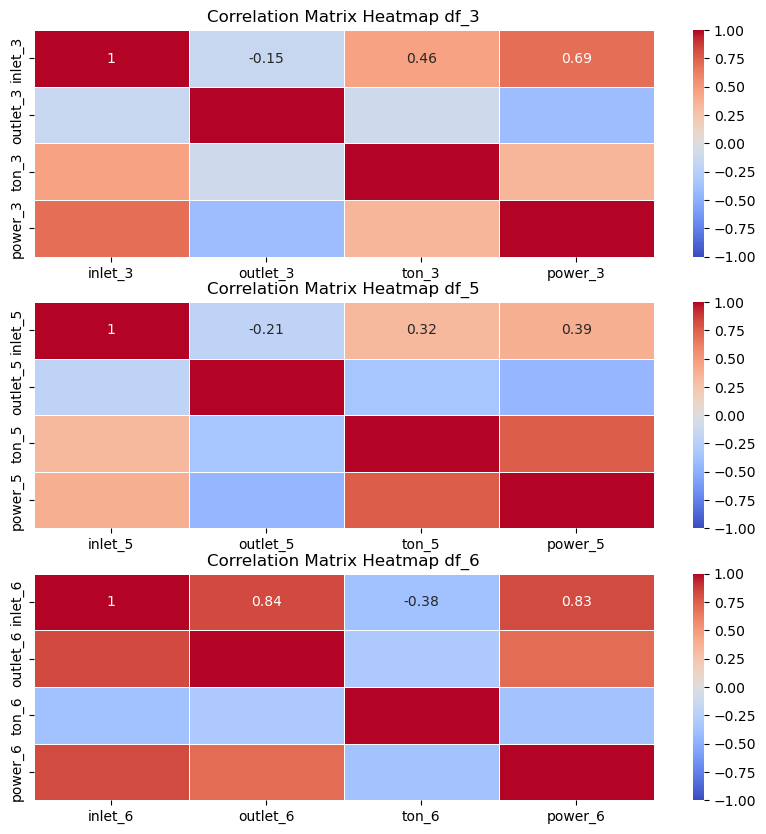

In [32]:
y = df_3.inlet_3.values
print('y_value : inlet_3')
for item in ['outlet_3','ton_3','power_3']:
    print(item)
    x = df_3[item].values
    print('covariance: {:.6f}'.format(np.cov(x,y)[0,1]))
    print('correlation: {:.2f}'.format(stats.pearsonr(x,y)[0]))
    print('p-value: {:.3f}'.format(stats.pearsonr(x,y)[1]))
    print('\n')
print('#'*50)

y = df_5.inlet_5.values
print('y_value : inlet_5')
for item in ['outlet_5','ton_5','power_5']:
    print(item)
    x = df_5[item].values
    print('covariance: {:.6f}'.format(np.cov(x,y)[0,1]))
    print('correlation: {:.2f}'.format(stats.pearsonr(x,y)[0]))
    print('p-value: {:.3f}'.format(stats.pearsonr(x,y)[1]))
    print('\n')
print('#'*50)
      
y = df_6.inlet_6.values
print('y_value : inlet_6')
for item in ['outlet_6','ton_6','power_6']:
    print(item)
    x = df_6[item].values
    print('covariance: {:.6f}'.format(np.cov(x,y)[0,1]))
    print('correlation: {:.2f}'.format(stats.pearsonr(x,y)[0]))
    print('p-value: {:.3f}'.format(stats.pearsonr(x,y)[1]))
    print('\n')

corr3 = df_3[['inlet_3','outlet_3','ton_3','power_3']].corr()
corr5 = df_5[['inlet_5','outlet_5','ton_5','power_5']].corr()
corr6 = df_6[['inlet_6','outlet_6','ton_6','power_6']].corr()
plt.figure(figsize=(10, 10))

plt.subplot(311)
sns.heatmap(corr3, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap df_3')

plt.subplot(312)
sns.heatmap(corr5, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap df_5')

plt.subplot(313)
sns.heatmap(corr6, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap df_6')

plt.show()

### dashboard 제작

In [37]:
df_3gg = df_3.reset_index().sort_values(by = 'date')
df_4gg = df_4.reset_index().sort_values(by = 'date')
df_5gg = df_5.reset_index().sort_values(by = 'date')
df_6gg = df_6.reset_index().sort_values(by = 'date')

### 3호기 5호기 6호기의 dashboard
### heatmap 존재

In [52]:
df_3gg['date'] = df_3gg['date'].astype(str)
df_5gg['date'] = df_5gg['date'].astype(str)
df_6gg['date'] = df_6gg['date'].astype(str)

column_max_values = {
    'power_3': 1200,
    'inlet_3': 1000,
    'outlet_3': 600,
    'ton_3': 100
}

external_stylesheets = [
    {
        "href": "https://fonts.googleapis.com/css2?family=Lato:wght@400;700&display=swap",
        "rel": "stylesheet",
    },
]

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = "inout Analytics: Understand Your Data!"

app.layout = html.Div(children=[
    html.Div(
        children=[
            html.H1(children='inout Analytics', className='header_title'),
            html.P(children='inout', className='header_description'),
        ],
        className='header'
    ),
    html.Div(
        children=[
            html.Div(children='Date Range', className='menu-title'),
            dcc.DatePickerRange(
                id='date-range',
                min_date_allowed=pd.to_datetime(df_3gg['date']).min().date(),
                max_date_allowed=pd.to_datetime(df_3gg['date']).max().date(),
                initial_visible_month=pd.to_datetime(df_3gg['date']).min().date(),
                start_date=pd.to_datetime(df_3gg['date']).min().date(),
                end_date=pd.to_datetime(df_3gg['date']).max().date(),
            ),
            html.Div(children='Select Graph Type', className='menu-title'),
            dcc.Dropdown(
                id='graph-type',
                options=[
                    {'label': 'Line', 'value': 'line'},
                    {'label': 'Box', 'value': 'box'},
                    {'label': 'Histogram', 'value': 'histogram'},
                    {'label': 'heatmap', 'value': 'heatmap'}
                ],
                value='line'
            ),
            html.Div(children='Select Normalization', className='menu-title'),
            dcc.Dropdown(
                id='data-nor',
                options=[
                    {'label': 'no_option', 'value': 'no_option'},
                    {'label': 'Normalization', 'value': 'normalization'}
                ],
                value='no_option'            
            ),
            html.Div(children='Select Data Columns', className='menu-title'),
            dcc.Dropdown(
                id='data-columns',
                options=[
                    {'label': 'Power', 'value': 'power_3'},
                    {'label': 'Inlet', 'value': 'inlet_3'},
                    {'label': 'Outlet', 'value': 'outlet_3'},
                    {'label': 'Ton', 'value': 'ton_3'},
                    {'label': 'PH', 'value': 'ph_3'},
                ],
                value=['power_3'],
                multi=True
            ),
            html.Div(children='Select Data Row', className='menu-title'),
            dcc.Dropdown(
                id='data-row',
                options=[
                    {'label': 'Date', 'value': 'date'},
                    {'label': 'Power', 'value': 'power_3'},
                    {'label': 'Inlet', 'value': 'inlet_3'},
                    {'label': 'Outlet', 'value': 'outlet_3'},
                    {'label': 'Ton', 'value': 'ton_3'},
                    {'label': 'PH', 'value': 'ph_3'}
                ],
                value='date'
            ),
            html.Div(children='Select Specific Column', className='menu-title'),
            dcc.Dropdown(
                id='specific-column',
                 options=[
                     {'label': 'Power', 'value': 'power_3'},
                     {'label': 'Inlet', 'value': 'inlet_3'},
                     {'label': 'Outlet', 'value': 'outlet_3'},
                     {'label': 'Ton', 'value': 'ton_3'},
                     {'label': 'PH', 'value': 'ph_3'}
                 ],
                value='power_3'
            ),
            html.Div(children='Select Range for Column', className='menu-title'),
            dcc.RangeSlider(
                id='column-range',
                min=0,
                max=1200,
                step=20,
                marks={i: str(i) for i in range(0, 1201, 100)},
                value=[0, 1200]
            ),
            html.Div(children='Select Specific Column2', className='menu-title'),
            dcc.Dropdown(
                id='specific-column2',
                 options=[
                     {'label': 'Power', 'value': 'power_3'},
                     {'label': 'Inlet', 'value': 'inlet_3'},
                     {'label': 'Outlet', 'value': 'outlet_3'},
                     {'label': 'Ton', 'value': 'ton_3'},
                     {'label': 'PH', 'value': 'ph_3'}
                 ],
                value='power_3'
            ),
            html.Div(children='Select Range for Column2', className='menu-title'),
            dcc.RangeSlider(
                id='column-range2',
                min=0,
                max=1200,
                step=20,
                marks={i: str(i) for i in range(0, 1201, 100)},
                value=[0, 1200]
            )
        ],
        className='menu'
    ),
    html.Div(
        children=[
            dcc.Graph(id='graph3', config={'displayModeBar': False}),
            dcc.Graph(id='graph5', config={'displayModeBar': False}),
            dcc.Graph(id='graph6', config={'displayModeBar': False}),
        ],
        className='card',
    )
])

@app.callback(
    [Output('column-range', 'min'),
     Output('column-range', 'max'),
     Output('column-range', 'step'),
     Output('column-range', 'marks'),
     Output('column-range', 'value')],
    [Input('specific-column', 'value')]
)
def update_slider_range(specific_column):
    max_value = column_max_values[specific_column]
    step = max_value // 60
    marks = {i: str(i) for i in range(0, max_value + 1, max_value // 12)}
    value = [0, max_value]
    return 0, max_value, step, marks, value

@app.callback(
    [Output('column-range2', 'min'),
     Output('column-range2', 'max'),
     Output('column-range2', 'step'),
     Output('column-range2', 'marks'),
     Output('column-range2', 'value')],
    [Input('specific-column2', 'value')]
)
def update_slider_range2(specific_column):
    max_value = column_max_values[specific_column]
    step = max_value // 60
    marks = {i: str(i) for i in range(0, max_value + 1, max_value // 12)}
    value = [0, max_value]
    return 0, max_value, step, marks, value

@app.callback(
    [Output('graph3', 'figure'),
     Output('graph5', 'figure'),
     Output('graph6', 'figure')],
    [Input('date-range', 'start_date'),
     Input('date-range', 'end_date'),
     Input('graph-type', 'value'),
     Input('data-nor', 'value'),
     Input('data-columns', 'value'),
     Input('data-row', 'value'),
     Input('specific-column', 'value'),
     Input('column-range', 'value'),
     Input('specific-column2', 'value'),
     Input('column-range2', 'value'),]
)
def update_charts(start_date, end_date, graph_type, data_nor, data_columns, data_row, specific_column, column_range, specific_column2, column_range2):
    def filter_data(df, start, end):
        df['date'] = pd.to_datetime(df['date'])
        end = pd.to_datetime(end) + pd.Timedelta(days=1)
        return df.loc[(df['date'] >= start) & (df['date'] <= end)]

    filtered_data_3gg = filter_data(df_3gg, start_date, end_date)
    filtered_data_5gg = filter_data(df_5gg, start_date, end_date)
    filtered_data_6gg = filter_data(df_6gg, start_date, end_date)

    def apply_range_filter(df, column, range_values):
        return df.loc[(df[column] >= range_values[0]) & (df[column] <= range_values[1])]

    filtered_data_3gg = apply_range_filter(filtered_data_3gg, specific_column, column_range)
    filtered_data_5gg = apply_range_filter(filtered_data_5gg, specific_column.replace('3', '5'), column_range)
    filtered_data_6gg = apply_range_filter(filtered_data_6gg, specific_column.replace('3', '6'), column_range)

    filtered_data_3gg = apply_range_filter(filtered_data_3gg, specific_column2, column_range2)
    filtered_data_5gg = apply_range_filter(filtered_data_5gg, specific_column2.replace('3', '5'), column_range2)
    filtered_data_6gg = apply_range_filter(filtered_data_6gg, specific_column2.replace('3', '6'), column_range2)
    
    def create_line_fig(filtered_data, x_col, y_cols, title):
        fig = go.Figure()
        for y_col in y_cols:
            fig.add_trace(go.Scatter(x=filtered_data[x_col], y=filtered_data[y_col], mode='lines', name=y_col))
            area = filtered_data[y_cols].sum()
            title += f" | Area under {y_col}: {area[0]:.2f}"
        fig.update_layout(title=title, xaxis_title=x_col, yaxis_title=', '.join(y_cols))
        return fig

    def create_box_fig(filtered_data, y_cols, title):
        fig = px.box(filtered_data, y=y_cols, title=title)
        return fig

    def create_histogram_fig(filtered_data, x_cols, title):
        fig = px.histogram(filtered_data, x=x_cols, nbins=10, title=title)
        return fig

    def create_heatmap_fig(df, x_cols, title):
        corr = np.array(df[x_cols].corr())
        text_corr = [[f'{corr:.2f}' for corr in row] for row in corr]

        fig = go.Figure(data=go.Heatmap(z=corr, x=x_cols, y=x_cols, hoverinfo='text', text=text_corr, colorscale='Viridis'))
        fig.update_layout(title=title)
        return fig

    fig3, fig5, fig6 = None, None, None

    if graph_type == 'line' and data_nor == 'no_option':
        filtered_data_3gg.sort_values(by=data_row, inplace=True)
        filtered_data_5gg.sort_values(by=data_row.replace('3', '5'), inplace=True)
        filtered_data_6gg.sort_values(by=data_row.replace('3', '6'), inplace=True)

        fig3 = create_line_fig(filtered_data_3gg, data_row, data_columns, f'Daily for {", ".join(data_columns)} (3gg)')
        fig5 = create_line_fig(filtered_data_5gg, data_row.replace('3', '5'), [col.replace('3', '5') for col in data_columns], f'Daily for {", ".join([col.replace("3", "5") for col in data_columns])} (5gg)')
        fig6 = create_line_fig(filtered_data_6gg, data_row.replace('3', '6'), [col.replace('3', '6') for col in data_columns], f'Daily for {", ".join([col.replace("3", "6") for col in data_columns])} (6gg)')

    if graph_type == 'line' and data_row == 'ton_3' and data_columns == ['outlet_3','inlet_3'] and data_nor == 'normalization':
        filtered_data_3gg.sort_values(by=data_row, inplace=True)
        filtered_data_5gg.sort_values(by=data_row.replace('3', '5'), inplace=True)
        filtered_data_6gg.sort_values(by=data_row.replace('3', '6'), inplace=True)
        
        columns_to_normalize3 = ['outlet_3','inlet_3']
        columns_to_normalize5 = ['outlet_5','inlet_5']
        columns_to_normalize6 = ['outlet_6','inlet_6']

        scaler = MinMaxScaler()
        filtered_data_3gg[['nor_o3','nor_i3']] = scaler.fit_transform(filtered_data_3gg[columns_to_normalize3])
        filtered_data_5gg[['nor_o5','nor_i5']] = scaler.fit_transform(filtered_data_5gg[columns_to_normalize5])
        filtered_data_6gg[['nor_o6','nor_i6']] = scaler.fit_transform(filtered_data_6gg[columns_to_normalize6])
            
        fig3 = create_line_fig(filtered_data_3gg, data_row, ['nor_o3','nor_i3'], f'Daily Mean for {", ".join(data_columns)} (3gg)')
        fig5 = create_line_fig(filtered_data_5gg, data_row.replace('3', '5'), ['nor_o5','nor_i5'], f'Daily Mean for {", ".join([col.replace("3", "5") for col in data_columns])} (5gg)')
        fig6 = create_line_fig(filtered_data_6gg, data_row.replace('3', '6'), ['nor_o6','nor_i6'], f'Daily Mean for {", ".join([col.replace("3", "6") for col in data_columns])} (6gg)')
    
    elif graph_type == 'box' and data_nor == 'no_option':
        fig3 = create_box_fig(filtered_data_3gg, data_columns, f'Box Plot for {", ".join(data_columns)} (3gg)')
        fig5 = create_box_fig(filtered_data_5gg, [col.replace('3', '5') for col in data_columns], f'Box Plot for {", ".join([col.replace("3", "5") for col in data_columns])} (5gg)')
        fig6 = create_box_fig(filtered_data_6gg, [col.replace('3', '6') for col in data_columns], f'Box Plot for {", ".join([col.replace("3", "6") for col in data_columns])} (6gg)')

        if data_columns == ['inlet_3','outlet_3'] and data_nor == 'normalization':
                
            columns_to_normalize3 = ['inlet_3','outlet_3']
            columns_to_normalize5 = ['inlet_5','outlet_5']
            columns_to_normalize6 = ['inlet_6','outlet_6']

            scaler = MinMaxScaler()
            filtered_data_3gg[['nor_i3','nor_o3']] = scaler.fit_transform(filtered_data_3gg[columns_to_normalize3])
            filtered_data_5gg[['nor_i5','nor_o5']] = scaler.fit_transform(filtered_data_5gg[columns_to_normalize5])
            filtered_data_6gg[['nor_i6','nor_o6']] = scaler.fit_transform(filtered_data_6gg[columns_to_normalize6])
            
            fig3 = create_box_fig(filtered_data_3gg, ['nor_i3','nor_o3'], f'Box Plot for {", ".join(data_columns)} (3gg)')
            fig5 = create_box_fig(filtered_data_5gg, ['nor_i5','nor_o5'], f'Box Plot for {", ".join([col.replace("3", "5") for col in data_columns])} (5gg)')
            fig6 = create_box_fig(filtered_data_6gg, ['nor_i6','nor_o6'], f'Box Plot for {", ".join([col.replace("3", "6") for col in data_columns])} (6gg)')

    elif graph_type == 'histogram' and data_nor == 'no_option':
        fig3 = create_histogram_fig(filtered_data_3gg, data_columns, f'Histogram for {", ".join(data_columns)} (3gg)')
        fig5 = create_histogram_fig(filtered_data_5gg, [col.replace('3', '5') for col in data_columns], f'Histogram for {", ".join([col.replace("3", "5") for col in data_columns])} (5gg)')
        fig6 = create_histogram_fig(filtered_data_6gg, [col.replace('3', '6') for col in data_columns], f'Histogram for {", ".join([col.replace("3", "6") for col in data_columns])} (6gg)')

    elif graph_type == 'heatmap' and data_nor == 'no_option':
        fig3 = create_heatmap_fig(filtered_data_3gg, data_columns, f'Histogram for {", ".join(data_columns)} (3gg')
        fig5 = create_heatmap_fig(filtered_data_5gg, [col.replace('3', '5') for col in data_columns], f'Histogram for {", ".join([col.replace("3", "5") for col in data_columns])} (5gg)')
        fig6 = create_heatmap_fig(filtered_data_6gg, [col.replace('3', '6') for col in data_columns], f'Histogram for {", ".join([col.replace("3", "6") for col in data_columns])} (6gg)')
    return fig3, fig5, fig6

if __name__ == '__main__':
    port = 8063
    print(f"Dash app is running on http://127.0.0.1:{port}")
    app.run_server(debug=True, port=port)

Dash app is running on http://127.0.0.1:8063
